In [17]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

In [18]:
c=pd.read_csv('CACI_InterviewAssessment_BillDefaults_Data.csv')

In [19]:
c.head()

,uid,late_default,cli_anc,cli_ageband,cli_payment,oc_inc0010,oc_inc50pl,oc_children3pl,oc_children0004,oc_children0510,oc_retired,oc_selfemp,oc_student,oc_unemp,oc_socrent,oc_privrent,oc_overdraft,oc_savs10pl,oc_cards2pl
0,1,1,3300,2,P,0.030355,0.475623,0.021374,0.165254,0.132862,0.000031,0.150273,0.042310,0.025378,0.012832,0.793294,0.172783,0.179815,0.306499
1,2,0,3010,4,D,0.313327,0.060590,0.027987,0.024381,0.066548,0.001478,0.118803,0.007655,0.075782,0.750370,0.069109,0.114262,0.036342,0.075723
2,3,0,2780,6,D,0.063608,0.161459,0.001920,0.003073,0.005036,0.817904,0.021434,0.002262,0.000317,0.026640,0.021453,0.056320,0.304369,0.195838
3,4,0,4400,3,D,0.013214,0.469807,0.195210,0.169214,0.413697,0.000132,0.101393,0.023778,0.029276,0.022806,0.120235,0.184631,0.147863,0.286992
4,5,0,4540,4,D,0.007277,0.527970,0.180975,0.218566,0.414872,0.001453,0.119810,0.002274,0.031067,0.001271,0.082093,0.181568,0.203448,0.244626


In [20]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uid              20000 non-null  int64  
 1   late_default     20000 non-null  int64  
 2   cli_anc          20000 non-null  int64  
 3   cli_ageband      20000 non-null  int64  
 4   cli_payment      20000 non-null  object 
 5   oc_inc0010       20000 non-null  float64
 6   oc_inc50pl       20000 non-null  float64
 7   oc_children3pl   20000 non-null  float64
 8   oc_children0004  20000 non-null  float64
 9   oc_children0510  20000 non-null  float64
 10  oc_retired       20000 non-null  float64
 11  oc_selfemp       20000 non-null  float64
 12  oc_student       20000 non-null  float64
 13  oc_unemp         20000 non-null  float64
 14  oc_socrent       20000 non-null  float64
 15  oc_privrent      20000 non-null  float64
 16  oc_overdraft     20000 non-null  float64
 17  oc_savs10pl 

In [21]:
c.describe()

,uid,late_default,cli_anc,cli_ageband,oc_inc0010,oc_inc50pl,oc_children3pl,oc_children0004,oc_children0510,oc_retired,oc_selfemp,oc_student,oc_unemp,oc_socrent,oc_privrent,oc_overdraft,oc_savs10pl,oc_cards2pl
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.187250,3529.824500,3.89505,0.074449,0.300304,0.064532,0.110644,0.148161,0.193507,0.089410,0.047410,0.021899,0.135340,0.212697,0.140028,0.165753,0.185484
std,5773.647028,0.390122,4058.201875,1.74519,0.075572,0.159374,0.077166,0.125292,0.149527,0.344225,0.044591,0.105517,0.020656,0.237414,0.208944,0.063712,0.123325,0.105362
min,1.000000,0.000000,1500.000000,1.00000,0.001618,0.001081,0.000042,0.000154,0.000225,0.000008,0.001781,0.000451,0.000017,0.000673,0.002915,0.007466,0.001580,0.001744
25%,5000.750000,0.000000,2490.000000,2.00000,0.023501,0.172284,0.006586,0.008681,0.014808,0.000054,0.049643,0.003156,0.009442,0.005176,0.056686,0.092949,0.064929,0.101768
50%,10000.500000,0.000000,3490.000000,4.00000,0.046928,0.299422,0.038373,0.037014,0.094227,0.000549,0.096451,0.007251,0.018500,0.025498,0.132908,0.143872,0.133230,0.178085
75%,15000.250000,0.000000,4490.000000,5.00000,0.096848,0.418561,0.096738,0.204455,0.283517,0.115121,0.120625,0.034401,0.029215,0.113589,0.297860,0.187885,0.247673,0.257559
max,20000.000000,1.000000,523450.000000,7.00000,0.545317,0.798334,0.653977,0.628564,0.616068,0.965043,0.310156,0.857370,0.191975,0.958632,0.951493,0.333836,0.622648,0.636515


In [22]:
# Count the occurrences of late default and print them
occ = c['late_default'].value_counts()
occ

0    16255
1     3745
Name: late_default, dtype: int64

In [23]:
# Print the ratio of fraud cases
ratio_cases = occ/len(c.index)
print(f'Ratio of late_default cases: {ratio_cases[1]}\nRatio of non-late_default cases: {ratio_cases[0]}')

Ratio of late_default cases: 0.18725
Ratio of non-late_default cases: 0.81275


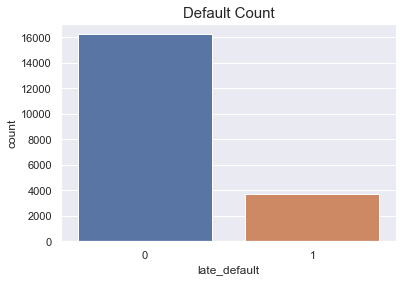

In [24]:
sns.countplot(c.late_default)
plt.title('Default Count',  fontsize = 15)
plt.show()

### Feature Engineering

In [26]:
import copy
cf_num = copy.deepcopy(c)
# get categorical columns
cf_cat = cf_num.select_dtypes(include=[object])
cf_cat.head()

,cli_payment
0,P
1,D
2,D
3,D
4,D


cli_payment  Count
          D   9418
          P   5580
          C   5002


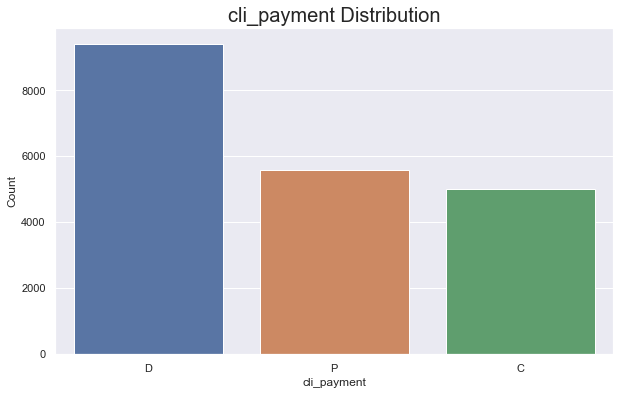

In [27]:
# name: var_dist()
# function: show single variable's distribution
# arguments: 
            # dataframe: dataframe
            # varName: column name (e.g.: 'quality')
            # (optional) varName: name for the plot title

def var_dist(dataframe,variable, *args, **kwargs):
    count = dataframe[variable].value_counts()
    count_df = pd.DataFrame({variable: count.index,'Count': count.values})
    print(count_df.to_string(index=False))
    # plot the distribution
    plt.figure(figsize=(10,6))
    sns.barplot(x = variable, y ="Count", data = count_df)
    # fetch optional argument varName
    varName = kwargs.get('varName', None)
    if varName != None:
        plt.title(varName + ' Distribution',fontsize=20)
    else:
        plt.title(variable + ' Distribution',fontsize=20)   
    plt.show()
var_dist(cf_cat,'cli_payment')

In [28]:
#Encoding with Dummy Function
cf = pd.get_dummies(c)
cf.head()

,uid,late_default,cli_anc,cli_ageband,oc_inc0010,oc_inc50pl,oc_children3pl,oc_children0004,oc_children0510,oc_retired,oc_selfemp,oc_student,oc_unemp,oc_socrent,oc_privrent,oc_overdraft,oc_savs10pl,oc_cards2pl,cli_payment_C,cli_payment_D,cli_payment_P
0,1,1,3300,2,0.030355,0.475623,0.021374,0.165254,0.132862,0.000031,0.150273,0.042310,0.025378,0.012832,0.793294,0.172783,0.179815,0.306499,0,0,1
1,2,0,3010,4,0.313327,0.060590,0.027987,0.024381,0.066548,0.001478,0.118803,0.007655,0.075782,0.750370,0.069109,0.114262,0.036342,0.075723,0,1,0
2,3,0,2780,6,0.063608,0.161459,0.001920,0.003073,0.005036,0.817904,0.021434,0.002262,0.000317,0.026640,0.021453,0.056320,0.304369,0.195838,0,1,0
3,4,0,4400,3,0.013214,0.469807,0.195210,0.169214,0.413697,0.000132,0.101393,0.023778,0.029276,0.022806,0.120235,0.184631,0.147863,0.286992,0,1,0
4,5,0,4540,4,0.007277,0.527970,0.180975,0.218566,0.414872,0.001453,0.119810,0.002274,0.031067,0.001271,0.082093,0.181568,0.203448,0.244626,0,1,0


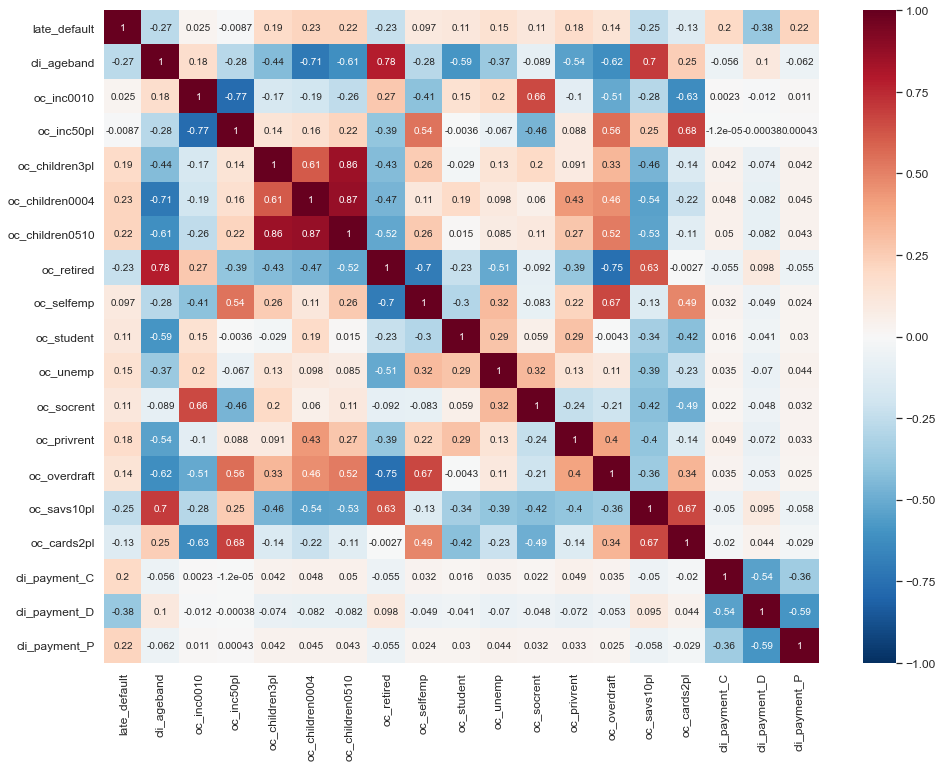

In [49]:
cf_corr = cf.drop(['uid','cli_anc'], axis=1) 
cor=cf_corr.corr()
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(cor, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

### Splitting the Data Set

In [50]:
X = cf.drop(['late_default','uid'], axis=1)  
y = cf['late_default']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

### Logistic Regression

In [56]:
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5, solver='liblinear')

model.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 15}, random_state=5,
                   solver='liblinear')

In [57]:
from IPython.display import Markdown, display
# Basic packages
import copy
import time #
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

# import customized functions


# show full pandas table
pd.set_option('display.max_columns', 500)
# show full numpy array
import sys
np.set_printoptions(threshold=sys.maxsize)

# import sklearn packages
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from matplotlib import pyplot as plt
#from sklearn.neural_network import MLPRegressor
from math import sqrt

# import visualization libraries
from IPython.display import Image  
import pydotplus

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# TO ignore future warnings from sklearn and seaborn
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn

# make the output stable across runs
np.random.seed(42)

In [61]:
# name: get_results()
# function: show model results, eg. accuracy, precision, recall, f1-score, roc_auc
# arguments: 
            # clf: classifier
            # clf_name: classifier's name (e.g.: 'Decision Tree')

def get_results(clf,clf_name,X_train,y_train,X_test,y_test):
    y_pred = clf.predict(X_test)
    
    printmd('### Accuracy')
    print('Training Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_train, clf.predict(X_train))))    
    print('Test Accuracy('+clf_name+'): {:2.2%}'.format(accuracy_score(y_test, clf.predict(X_test))))
    printmd('***')
    printmd('### Classification Report') 
    print(classification_report(y_test, y_pred))
    
    probs = clf.predict_proba(X_test) # Predict class probabilities of the input samples 
    preds = probs[:,1]
    fpr,tpr,threshold = roc_curve(y_test, preds) 
    roc_auc = auc(fpr,tpr)
    print('ROC AUC Score('+clf_name+'): {:2.2%}'.format(roc_auc))
    
    printmd('***')
    printmd('### Cross-Validation')
    cv_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print('Accuracy: {:2.2%}'.format(np.mean(cv_accuracy)))
    cv_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
    print('Recall: {:2.2%}'.format(np.mean(cv_recall)))
    cv_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
    print('Precision: {:2.2%}'.format(np.mean(cv_precision)))
    cv_f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
    print('F1-score: {:2.2%}'.format(np.mean(cv_f1)))
    cv_roc_auc = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    print('ROC AUC Score: {:2.2%}'.format(np.mean(cv_roc_auc)))
    printmd('***')
    
    printmd('### Confusion Matrix')
#     accuracy = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
#     print('Accuracy\n',np.mean(accuracy),accuracy)
#     recall = cross_val_score(clf, x_train, y_train, cv=5, scoring='recall')
#     print('Recall\n', np.mean(recall), recall)
#     precision = cross_val_score(clf, x_train, y_train, cv=5, scoring='precision')
#     print('Precision\n', np.mean(precision), precision)
#     f1 = cross_val_score(clf, x_train, y_train, cv=5, scoring='f1')
#     print('F1\n', np.mean(f1), f1)
#     roc_auc = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc')
#     print('ROC AUC Score\n', np.mean(roc_auc), roc_auc)
#     print('Confusion matrix:\n', cm)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True,cmap='Blues')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix ('+clf_name+')',fontsize=16)
    
    # calculate the Optimum Threshold
    for i in range(len(fpr)):
        if fpr[i] + tpr[i] >= 1:
            i = i -1
            break
    plt.show()
    
    printmd('***')
    
    printmd('### ROC Curve')
    plt.plot(fpr, tpr, lw=1,label='ROC Curve(area = %0.3f)    Optimum Threshold = %0.3f' % (roc_auc, threshold[i]))
    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve ('+clf_name+')',fontsize=16)
    plt.legend(loc="lower right")
    plt.show()

In [62]:
# name: printmd()
# function: print with markdown format.
def printmd(string):
    display(Markdown(string))

### Accuracy

Training Accuracy(Logistic Regression - L2): 62.84%
Test Accuracy(Logistic Regression - L2): 63.00%


***

### Classification Report

              precision    recall  f1-score   support

           0       0.97      0.56      0.71      3244
           1       0.33      0.93      0.49       756

    accuracy                           0.63      4000
   macro avg       0.65      0.75      0.60      4000
weighted avg       0.85      0.63      0.67      4000

ROC AUC Score(Logistic Regression - L2): 83.50%


***

### Cross-Validation

Accuracy: 58.68%
Recall: 94.41%
Precision: 30.53%
F1-score: 46.11%
ROC AUC Score: 84.17%


***

### Confusion Matrix

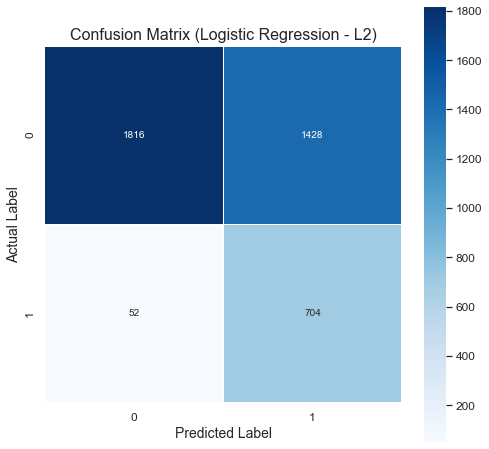

***

### ROC Curve

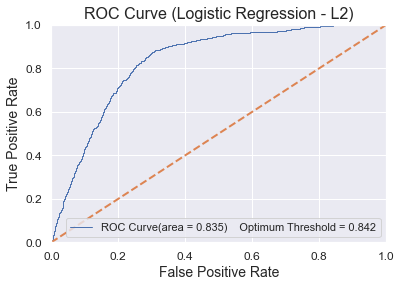

In [63]:
lr_result = get_results(model,'Logistic Regression - L2',X_train,y_train,X_test,y_test)

### 2.2.Logistic Regression with Upsampling

In [67]:
cf_Smote = copy.deepcopy(cf)

In [68]:
cf_Smote.head()

,uid,late_default,cli_anc,cli_ageband,oc_inc0010,oc_inc50pl,oc_children3pl,oc_children0004,oc_children0510,oc_retired,oc_selfemp,oc_student,oc_unemp,oc_socrent,oc_privrent,oc_overdraft,oc_savs10pl,oc_cards2pl,cli_payment_C,cli_payment_D,cli_payment_P
0,1,1,3300,2,0.030355,0.475623,0.021374,0.165254,0.132862,0.000031,0.150273,0.042310,0.025378,0.012832,0.793294,0.172783,0.179815,0.306499,0,0,1
1,2,0,3010,4,0.313327,0.060590,0.027987,0.024381,0.066548,0.001478,0.118803,0.007655,0.075782,0.750370,0.069109,0.114262,0.036342,0.075723,0,1,0
2,3,0,2780,6,0.063608,0.161459,0.001920,0.003073,0.005036,0.817904,0.021434,0.002262,0.000317,0.026640,0.021453,0.056320,0.304369,0.195838,0,1,0
3,4,0,4400,3,0.013214,0.469807,0.195210,0.169214,0.413697,0.000132,0.101393,0.023778,0.029276,0.022806,0.120235,0.184631,0.147863,0.286992,0,1,0
4,5,0,4540,4,0.007277,0.527970,0.180975,0.218566,0.414872,0.001453,0.119810,0.002274,0.031067,0.001271,0.082093,0.181568,0.203448,0.244626,0,1,0


In [73]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = cf_Smote.iloc[:, 2:30].values
    y = cf_Smote.Class.values
    return X, y

In [76]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="late_default #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="late_default #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [77]:
# Create X and y from the prep_data function 
X, y = prep_data(cf_Smote)

AttributeError: 'DataFrame' object has no attribute 'Class'

In [ ]:
plot_data(X, y)

In [64]:
# Define which resampling method and which ML model to use in the pipeline
# resampling = SMOTE(kind='borderline2')  # has been changed to BorderlineSMOTE
resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')

NameError: name 'BorderlineSMOTE' is not defined

In [42]:
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [ ]:
# Define resampling method and split into train and test
method = SMOTE(kind='borderline1')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Apply resampling to the training data only
X_resampled, y_resampled = method.fit_sample(X_train, y_train)

# Continue fitting the model and obtain predictions
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Get model performance metrics
predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

/Users/oyakesgin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


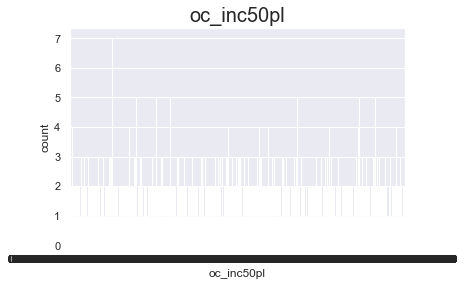

In [114]:
sns.countplot(c.oc_inc50pl)
plt.title('oc_inc50pl',  fontsize = 20)
plt.show()

In [115]:
from sklearn import preprocessing
from sklearn.utils import resample
le = preprocessing.LabelEncoder()

In [116]:
import copy
cf_num = copy.deepcopy(c)
# get categorical columns
cf_cat = cf_num.select_dtypes(include=[object])
cf_cat.head()

,cli_payment
0,P
1,D
2,D
3,D
4,D


In [73]:
# transform categorical columns value into numerical
#cf_num['cli_payment'] = le.fit_transform(cf_num['cli_payment'])

In [74]:
#cf_num.head()

In [75]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
# get categorical columns' index in main df
# name: get_sub_index()
# function: get sub dataframe columns' index numbers in a main dataframe
# arguments:
            # sub_df: sub-dataframe
            # main_df: main dataframe

def get_sub_index(main_df,sub_df):
    indexes = [main_df.columns.get_loc(col) for col in sub_df]
    return indexes


cat_idx = get_sub_index(cf_num,cf_cat)
cat_idx

[4]

In [118]:
ohe = OneHotEncoder(handle_unknown="ignore")

In [119]:
enc_cf = pd.DataFrame(ohe.fit_transform(cf_num[['cat_idx']]).toarray())

KeyError: "None of [Index(['cat_idx'], dtype='object')] are in the [columns]"

In [86]:
# one-hot encode X3

X1 = ohe.fit_transform(X)
X1[:1,-2:]

<1x2 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [82]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

In [83]:
# set features & target
y = cf_num['late_default']
X1 = cf_num.drop('late_default', axis=1)
X1.head()

,uid,cli_anc,cli_ageband,cli_payment,oc_inc0010,oc_inc50pl,oc_children3pl,oc_children0004,oc_children0510,oc_retired,oc_selfemp,oc_student,oc_unemp,oc_socrent,oc_privrent,oc_overdraft,oc_savs10pl,oc_cards2pl
0,1,3300,2,P,0.030355,0.475623,0.021374,0.165254,0.132862,0.000031,0.150273,0.042310,0.025378,0.012832,0.793294,0.172783,0.179815,0.306499
1,2,3010,4,D,0.313327,0.060590,0.027987,0.024381,0.066548,0.001478,0.118803,0.007655,0.075782,0.750370,0.069109,0.114262,0.036342,0.075723
2,3,2780,6,D,0.063608,0.161459,0.001920,0.003073,0.005036,0.817904,0.021434,0.002262,0.000317,0.026640,0.021453,0.056320,0.304369,0.195838
3,4,4400,3,D,0.013214,0.469807,0.195210,0.169214,0.413697,0.000132,0.101393,0.023778,0.029276,0.022806,0.120235,0.184631,0.147863,0.286992
4,5,4540,4,D,0.007277,0.527970,0.180975,0.218566,0.414872,0.001453,0.119810,0.002274,0.031067,0.001271,0.082093,0.181568,0.203448,0.244626


In [84]:
# Define which resampling method and which ML model to use in the pipeline
# resampling = SMOTE(kind='borderline2')  # has been changed to BorderlineSMOTE
resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')

In [44]:
X_train.shape

(16000, 18)

In [43]:
# split into training & test set (80%/20%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

### Logistic Regression with SMOTE


In [100]:
# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77      3261
           1       0.30      0.59      0.39       739

    accuracy                           0.66      4000
   macro avg       0.59      0.64      0.58      4000
weighted avg       0.77      0.66      0.70      4000

Confusion matrix:
 [[2215 1046]
 [ 301  438]]


In [21]:
# concatenate training data
cf_train = pd.concat([X_train, y_train], axis=1)

In [46]:
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

In [23]:
# separate churn0 & churn1
late_default0 = cf_train[cf_train['late_default']==0]
late_default1 = cf_train[cf_train['late_default']==1]

In [93]:
def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x, axis=0)
    x = x - mean_x
    std_x = np.std(x, axis=0)
    x = x / std_x
    return x, mean_x, std_x

def de_standardize(x, mean_x, std_x):
    """Reverse the procedure of standardization."""
    x = x * std_x
    x = x + mean_x
    return x

In [170]:
# Get the model results
#get_model_results(X_train, y_train, X_test, y_test, model)

ROC Score:
0.83497657865722

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.56      0.71      3244
           1       0.33      0.93      0.49       756

    accuracy                           0.63      4000
   macro avg       0.65      0.75      0.60      4000
weighted avg       0.85      0.63      0.67      4000


Confusion Matrix:
[[1816 1428]
 [  52  704]]


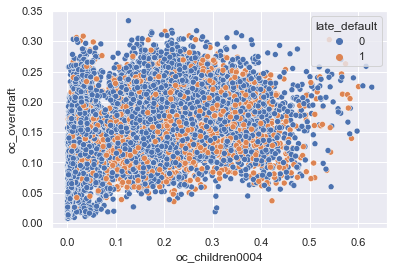

In [106]:
ax = sns.scatterplot(x="oc_children0004", y="oc_overdraft", hue="late_default", data=c)


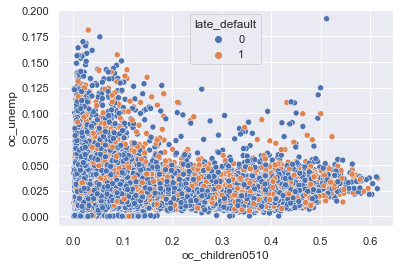

In [102]:
ax1 = sns.scatterplot(x="oc_children0510", y="oc_unemp", hue="late_default", data=c)


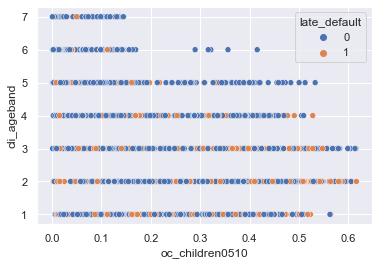

In [104]:
ax2 = sns.scatterplot(x="oc_children0510", y="cli_ageband", hue="late_default", data=c)


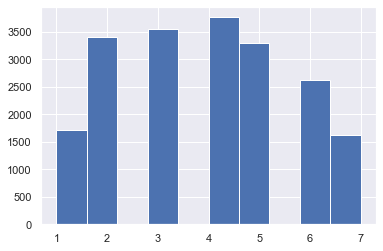

In [97]:
plt.hist(c['cli_ageband'])
plt.show()


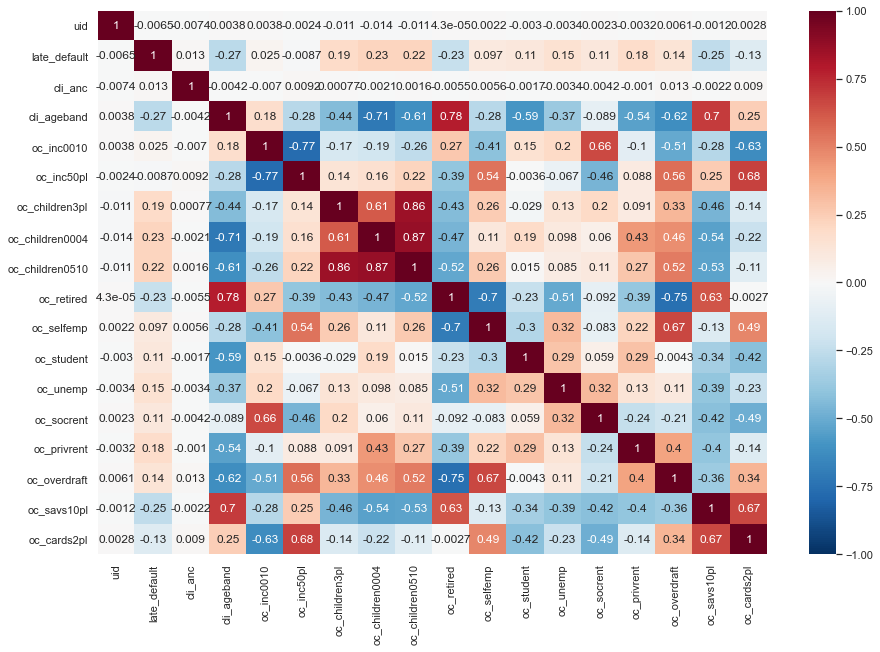

In [98]:
cor=c.corr()
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(cor, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
# quality is correlated more with alcohol and volatile_acidity than any other features.

In [176]:
#def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))